### Leio o dataset

Preferi não dividir em dois arquivos dessa vez

In [1]:
import pandas as pd

df = pd.read_csv("dataset/cars_24_combined.csv")
df.head()

,id,Car Name,Year,Distance,Owners,Fuel,Location,Drive,Type,Price
0,0,Maruti S PRESSO,2022.0,3878,1,PETROL,HR-98,Manual,HatchBack,514000
1,1,Hyundai Xcent,2018.0,32041,1,PETROL,TN-22,Manual,Sedan,674000
2,2,Tata Safari,2021.0,96339,1,DIESEL,TS-08,Automatic,SUV,1952000
3,3,Maruti Vitara Brezza,2019.0,51718,1,DIESEL,WB-24,Manual,SUV,690000
4,4,Tata Tiago,2021.0,19811,1,PETROL,HR-51,Manual,HatchBack,526000


### Vejo informações do dataset

Com isso, consigo saber o tipo das variáveis independentes

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8015 entries, 0 to 8014
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8015 non-null   int64  
 1   Car Name  8014 non-null   object 
 2   Year      8014 non-null   float64
 3   Distance  8015 non-null   int64  
 4   Owners    8015 non-null   int64  
 5   Fuel      8015 non-null   object 
 6   Location  7802 non-null   object 
 7   Drive     8015 non-null   object 
 8   Type      8015 non-null   object 
 9   Price     8015 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 626.3+ KB


### Descrevo as variáveis categóricas

In [3]:
df_categoricas = df[["Car Name","Fuel","Location","Drive","Type"]].astype(str)

qtd_unico = df_categoricas.nunique()
valores_unicos = df_categoricas.apply(lambda x: x.unique())

pd.DataFrame({'Quantidade de valores únicos': qtd_unico, 'Valores únicos': valores_unicos})

,Quantidade de valores únicos,Valores únicos
Car Name,127,"[Maruti S PRESSO, Hyundai Xcent, Tata Safari, ..."
Fuel,4,"[PETROL, DIESEL, CNG, LPG]"
Location,437,"[HR-98, TN-22, TS-08, WB-24, HR-51, MH-14, nan..."
Drive,2,"[Manual, Automatic]"
Type,5,"[HatchBack, Sedan, SUV, Lux_SUV, Lux_sedan]"


### Tiro a coluna do Id, Car Name e Location"

In [4]:
df = df.drop(["id","Car Name","Location"], axis=1)

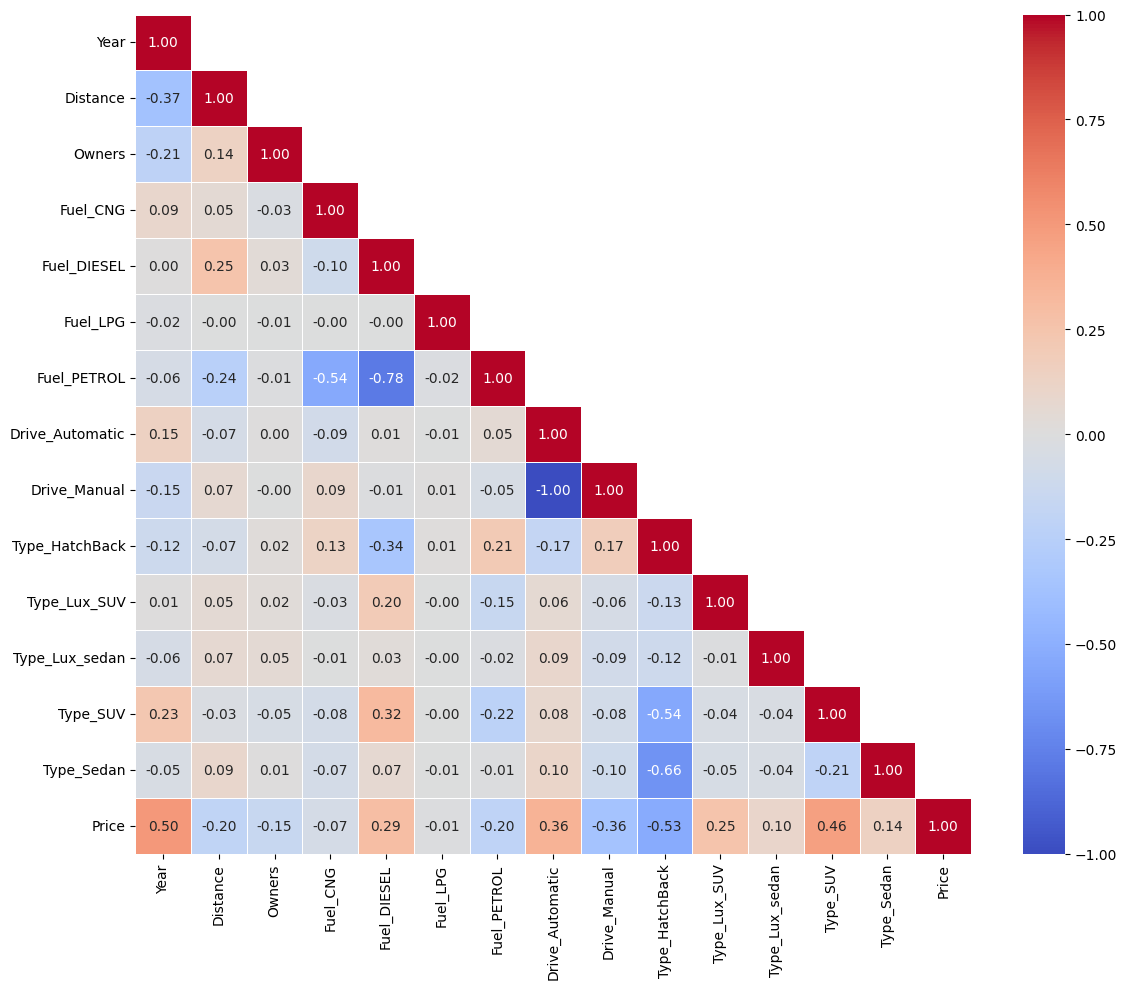

In [6]:
from correlation import show_pearson_correlation

df_encoded = pd.get_dummies(df, columns=["Fuel", "Drive", "Type"])
#df_encoded.info()

x = df_encoded.drop("Price", axis=1)[:-1]
y = df_encoded["Price"]

show_pearson_correlation(x, y)